Лабораторная работа 6. Яровенко Максим, ИУ5Ц-102Б. Вариант 22

# **Задание**

Задание 1.

$K$ программистов могут писать программы для выполнения на одном из $M$ серверов, при этом программа не попадает сразу на сервер, а обрабатывается на одном из $N$ специальных компьютеров, которые проверяют отсутствие вирусов. Интенсивность работы программистов $\lambda$, интенсивность работы компьютеров-антивирусов $\nu$, интенсивность работы основных серверов $\mu$, программа оказывается с вирусом с вероятностью $p$. Если программа с вирусом, она получает отказ обслуживания на основных серверах. Для компьютеров по проверке вирусов имеется ограничение по длине очереди $m_1$, для основных серверов ограничение по длине очереди $m_2$.

- Нарисовать граф состояний системы, учитывая количество программистов, которые пишут программу, количество программ на компьютерах-антивирусах, количество программ на серверах;
- Написать уравнения Колмогорова для вероятностей состояний, финальных вероятностей;
- Четырьмя способами (экспериментально, методом на основе параметров связи, методом на основе эквивалентности потоков, по уравнениям Колмогорова) найти основные характеристики эффективности СМО: среднее время пребывания заявки в системе, абсолютную пропускную способность, среднее число заявок в системе.

In [4]:
Variant<-22
set.seed(Variant)
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
View(data.frame(K,M,N,lambda,mu,nu,p,m1,m2))

K,M,N,lambda,mu,nu,p,m1,m2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
4,1,2,0.843231,0.7233145,0.6151681,0.7391713,1,1


# **Решение**

Граф

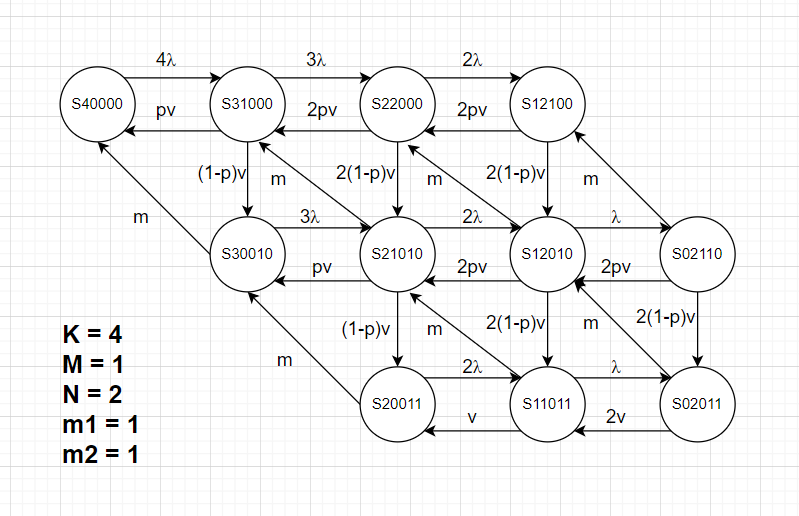

Введём состояния:

$S_{40000}$ - все 4 программиста пишут программу, сервера и компьютеры свободны, очереди нет  

$S_{31000}$ - 3 программиста пишут, 1 программа проверяется на вирус  

$S_{22000}$ - 2 программиста пишут, 2 программы проверяются на вирус

$S_{12100}$ - 1 программист пишет, 2 программы проверяются на вирус, 1 программа в очереди на проверку антивирусом

$S_{30010}$ - 3 программиста пишут, 1 обрабатывается на сервере

$S_{21010}$ - 2 программиста пишут, 1 программа проверяется на вирус, 1 обрабатывается на сервере

$S_{12010}$ - 1 программист пишет, 2 программы проверяются на вирус, 1 обрабатывается на сервере

$S_{02110}$ - 2 программы проверяются на вирус, 1 обрабатывается на сервере, 1 в очереди на проверку антивирусом

$S_{20011}$ - 2 программиста пишут, 1 обрабатывается на сервере, 1 в очереди на сервер

$S_{11011}$ - 1 программист пишет, 1 программа проверяется на вирус, 1 обрабатывается на сервере, 1 в очереди на сервер

$S_{02011}$ - 2 программы проверяются на вирус, 1 обрабатывается на сервере, 1 в очереди на сервер


**Уравнения Колмогорова**

---



$\frac{dP_{40000}(t)}{dt} = p \cdot \nu \cdot P_{31000}(t) + \mu \cdot P_{30010}(t) - 4 \cdot \lambda \cdot P_{40000}(t)$

$\frac{dP_{31000}(t)}{dt} = 4 \cdot \lambda \cdot P_{40000}(t) + 2 \cdot p \cdot \nu \cdot P_{22000}(t) + \mu \cdot P_{21010}(t) - p \cdot \nu \cdot P_{31000}(t) - 3 \cdot \lambda \cdot P_{31000}(t) - (1-p) \cdot \nu \cdot P_{31000}(t)$

$\frac{dP_{22000}(t)}{dt} = 3 \cdot \lambda \cdot P_{31000}(t) + 2 \cdot p \cdot \nu \cdot P_{12100}(t) + \mu \cdot P_{12010}(t) - 2 \cdot p \cdot \nu \cdot P_{22000}(t) - 2 \cdot \lambda \cdot P_{22000}(t) - 2 \cdot (1-p) \cdot \nu \cdot P_{22000}(t)$

$\frac{dP_{12100}(t)}{dt} = 2 \cdot \lambda \cdot P_{22000}(t) + \mu \cdot P_{02110}(t) - 2 \cdot p \cdot \nu \cdot P_{12100}(t) - 2 \cdot (1-p) \cdot \nu \cdot P_{12100}(t)$

$\frac{dP_{30010}(t)}{dt} = (1-p) \cdot \nu \cdot P_{31000}(t) + \mu \cdot P_{20011}(t) + p \cdot \nu \cdot P_{21010}(t) - \mu \cdot P_{30010}(t) - 3 \cdot \lambda \cdot P_{30010}(t)$

$\frac{dP_{21010}(t)}{dt} = 3 \cdot \lambda \cdot P_{30010}(t) + \mu \cdot P_{11011}(t) + 2 \cdot p \cdot \nu \cdot P_{12010}(t) + 2 \cdot (1-p) \cdot \nu \cdot P_{22000}(t) - \mu \cdot P_{21010}(t) - p \cdot \nu \cdot P_{21010}(t) - (1-p) \cdot \nu \cdot P_{21010}(t) - 2 \cdot \lambda \cdot P_{21010}(t)$

$\frac{dP_{12010}(t)}{dt} = 2 \cdot \lambda \cdot P_{21010}(t) + \mu \cdot P_{02011}(t) + 2 \cdot p \cdot \nu \cdot P_{02110}(t) + 2 \cdot (1-p) \cdot \nu \cdot P_{12100}(t) - \mu \cdot P_{12010}(t) - 2 \cdot p \cdot \nu \cdot P_{12010}(t) - 2 \cdot (1-p) \cdot \nu \cdot P_{12010}(t) - \lambda \cdot P_{12010}(t)$

$\frac{dP_{02110}(t)}{dt} = \lambda \cdot P_{12010}(t) - \mu \cdot P_{02110}(t) - 2 \cdot p \cdot \nu \cdot P_{02110}(t) - 2 \cdot (1-p) \cdot \nu \cdot P_{02110}(t)$

$\frac{dP_{20011}(t)}{dt} = (1-p) \cdot \nu \cdot P_{21010}(t) + \nu \cdot P_{11011}(t) - \mu \cdot P_{20011}(t) - 2 \cdot \lambda \cdot P_{20011}(t)$

$\frac{dP_{11011}(t)}{dt} = 2 \cdot \lambda \cdot P_{20011}(t) + 2 \cdot \nu \cdot P_{02011}(t) + 2 \cdot (1-p) \cdot \nu \cdot P_{12010}(t) - \mu \cdot P_{11011}(t) - \nu \cdot P_{11011}(t) - \lambda \cdot P_{11011}(t)$

$\frac{dP_{02011}(t)}{dt} = \lambda \cdot P_{11011}(t) + 2 \cdot (1-p) \cdot \nu \cdot P_{02110}(t) - \mu \cdot P_{02011}(t) - 2 \cdot \nu \cdot P_{02011}(t)$

Уравнение нормировки:
$P_{40000}+P_{31000}+P_{22000}+P_{12100}+P_{30010}+P_{21010}+P_{12010}+P_{02110}+P_{20011}+P_{11011}+P_{02011}=1$

Найдем финальные вариантности в Maxima:

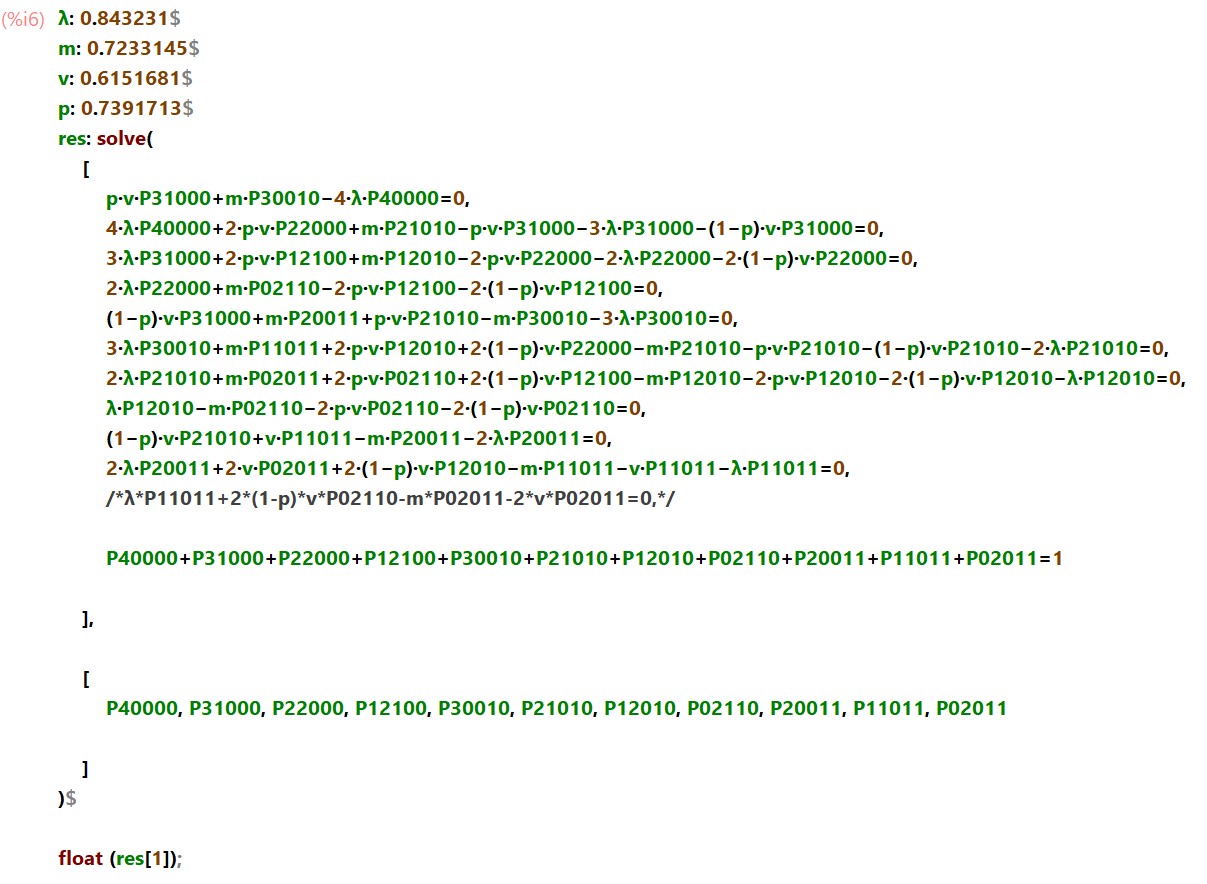

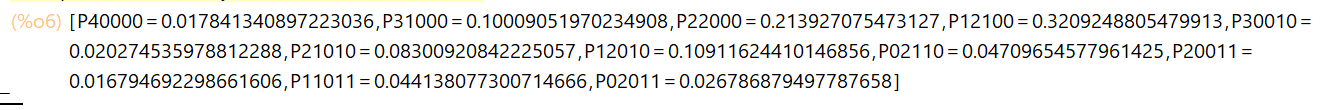

Финальные вероятноти системы:

$P_{40000} = 0.017841340897223036$

$P_{31000} = 0.10009051970234908$

$P_{22000} = 0.213927075473127$

$P_{12100} = 0.3209248805479913$

$P_{30010} = 0.020274535978812288$

$P_{21010} = 0.08300920842225057$

$P_{12010} = 0.10911624410146856$

$P_{02110} = 0.04709654577961425$

$P_{20011} = 0.016794692298661606$

$P_{11011} = 0.044138077300714666$

$P_{02011} = 0.026786879497787658$


**Основные характеристики эффективности СМО**

---



In [5]:
P_40000=0.01761047648127748
P_31000=0.09968209536824643
P_22000=0.21388633022382608
P_12100=0.3211257179568913

P_30010=0.019454738200856157
P_21010=0.08236122645658195
P_12010=0.11012783049078928
P_02110=0.047533164773302994

P_20011=0.013605722155036127
P_11011=0.043041509180596654
P_02011=0.03157118871259554

In [6]:
#Среднее число заявок в системе
L_sys = (P_31000 + P_30010)+ 2*(P_22000 + P_21010 + P_20011) + 3*(P_12100 + P_12010 + P_11011) + 4*(P_02110 + P_02011)
L_sys

[1] 2.478146

In [7]:
#Абсолютная пропускная способность
L_abs = mu*(P_30010 + P_21010 + P_12010 + P_02110 + P_20011 + P_11011 + P_02011)
L_abs

[1] 0.2514931

In [8]:
#Среднее время пребывания в системе
T_sys = L_sys/(K - L_sys)/lambda
T_sys

[1] 1.931111

In [9]:
table = data.frame(c(L_abs, L_sys, T_sys))
rownames(table) <- c("Абсолютная пропускная способность", "Среднее число заявок в системе", "Cреднее время пребывания заявки в системе")
table

,c.L_abs..L_sys..T_sys.
,<dbl>
Абсолютная пропускная способность,0.2514931
Среднее число заявок в системе,2.4781460
Cреднее время пребывания заявки в системе,1.9311113


**Основные характеристики эффективности СМО методом на основе параметров связи**

---




Предложим декомпозицию задачи в виде двух моделей.

In [10]:
mu

[1] 0.7233145

В первой модели совокупность серверов и компьютеров по проверке наличия вирусов заменим обобщенным параметром - интенсивностью обслуживания
$\mu_{общ}$.

Возьмем $ \mu_{общ} = 0,05$

In [11]:
m_ob = 0.05

Новая модель будет обычной моделью рождения гибели для замкнутой системы.
Считаем:

In [12]:
P0 = 1/(1 + K*lambda/m_ob + K*(K - 1)*lambda^2/(m_ob^2) + K*(K - 1)*(K-2)*lambda^3/(m_ob^3) + K*(K - 1)*(K-2)*(K-3)*lambda^4/m_ob^4)
P1 = P0 * (K*lambda/m_ob)
P2 = P0 * (K*(K - 1)*lambda^2/(m_ob^2))
P3 = P0 * (K*(K - 1)*(K-2)*lambda^3/(m_ob^3))
P4 = P0 * (K*(K - 1)*(K-2)*(K-3)*lambda^4/(m_ob^4))

P0;P1;P2;P3;P4

[1] 4.854345e-07

[1] 3.274668e-05

[1] 0.001656781

[1] 0.05588196

[1] 0.942428

$$L_{\text{сист}}=\sum_{k=1}^K k\cdot P_k = 3.70481978251904$$

In [13]:
Lsys = P1 + 2*P2 + 3*P3 + 4*P4
Lsys

[1] 3.940704

Вторая модель $$L_{\text{сист}} \approx 4$$



Во второй модели будем считать, что в системе постоянно циркулируют $L_{\text{сист}}$ заявок. В качестве состояний системы возьмем количество заявок, обрабатываемых на основных серверах:

$\nu_n=(1-p)\nu\cdot \min{(N,L_{\text{сист}}-n)},$  где $n=0,\ldots,L_{\text{сист}}-1$

$\mu_n=\mu\cdot \min{(M, n)},$ где $n=1,2, \ldots,L_{\text{сист}}$

Рассчитаем:

$$\nu_0=(1-p)\nu \cdot \min(2,4-0)=(1-p)\nu \cdot 2 $$
$$\nu_1=(1-p)\nu \cdot \min(2,4-1)=(1-p)\nu \cdot 2 $$
$$\nu_2=(1-p)\nu \cdot \min(2,4-2)=(1-p)\nu \cdot 2 $$
$$\nu_3=(1-p)\nu \cdot \min(2,4-3)=(1-p)\nu \cdot 1 $$

$$\mu_1=\mu \cdot \min(1,1)=\mu$$
$$\mu_2=\mu \cdot \min(1,2)=\mu$$
$$\mu_3=\mu \cdot \min(1,3)=\mu$$
$$\mu_3=\mu \cdot \min(1,4)=\mu$$


In [14]:
nu_0 = (1-p)*nu*2
nu_1 = (1-p)*nu*2
nu_2 = (1-p)*nu*2
nu_3 = (1-p)*nu*1

nu_0
nu_1
nu_2
nu_3

[1] 0.3209069

[1] 0.3209069

[1] 0.3209069

[1] 0.1604535

In [15]:
mu_1 = mu
mu_2 = mu
mu_3 = mu
mu_4 = mu

mu_1
mu_2
mu_3
mu_4

[1] 0.7233145

[1] 0.7233145

[1] 0.7233145

[1] 0.7233145

Для данной системы посчитаем финальные вероятности:

$$\pi_0=\left(1+\frac{\nu_0}{\mu_1} + \frac{\nu_0}{\mu_1} \cdot \frac{\nu_1}{\mu_2} + \frac{\nu_0}{\mu_1} \cdot \frac{\nu_1}{\mu_2} \cdot \frac{\nu_2}{\mu_3}  \right)^{-1} $$

$$\pi_1=\pi_0\cdot \frac{\nu_0}{\mu_1} $$

$$\pi_2=\pi_0 \cdot \frac{\nu_0}{\mu_1} \cdot \frac{\nu_1}{\mu_2}$$

$$\pi_3=\pi_0 \cdot \frac{\nu_0}{\mu_1} \cdot \frac{\nu_1}{\mu_2} \cdot \frac{\nu_2}{\mu_3} $$

Тогда:

$$\mu_{\text{общ}}=\sum_{n=1}^{L_{\text{сист}}}\pi_n\cdot \mu_n=\pi_1\cdot \mu_1 + \pi_2\cdot \mu_2 + \pi_3\cdot \mu_3$$

In [16]:
pi_0 = 1/(1+nu_0/mu_1 + nu_0/mu_1*nu_1/mu_2 + nu_0/mu_1*nu_1/mu_2*nu_2/mu_3 + nu_0/mu_1*nu_1/mu_2*nu_2/mu_3*nu_3/mu_4)
pi_1 = pi_0 * nu_0/mu_1
pi_2 =  pi_0 * nu_0/mu_1*nu_1/mu_2
pi_3 =  pi_0 * nu_0/mu_1*nu_1/mu_2*nu_2/mu_3
pi_3 =  pi_0 * nu_0/mu_1*nu_1/mu_2*nu_2/mu_3*nu_3/mu_4

pi_0
pi_1
pi_2
pi_3

[1] 0.572345

[1] 0.2539275

[1] 0.1126579

[1] 0.01108755

In [17]:
mu_ob = pi_1*mu_1 + pi_2*mu_2 + pi_3*mu_3
mu_ob

[1] 0.2731764

$$\mu_{\text{общ}} \approx 0.27$$

Выполним еще одну итерацию при $\mu_{\text{общ}} = 0.27317637830936$

In [18]:
P0 = 1/(1+K*lambda/mu_ob + K*(K - 1)*lambda^2/mu_ob^2 + K*(K - 1)*(K-2)*lambda^3/mu_ob^3 + K*(K - 1)*(K-2)*(K-3)*lambda^4/mu_ob^4)
P1 = P0*K*lambda/mu_ob
P2 = P0*K*(K - 1)*lambda^2/mu_ob^2
P3 = P0*K*(K - 1)*(K-2)*lambda^3/mu_ob^3
P4 = P0*K*(K - 1)*(K-2)*(K-3)*lambda^4/mu_ob^4

P0
P1
P2
P3
P4

[1] 0.0003319626

[1] 0.004098761

[1] 0.03795572

[1] 0.2343207

[1] 0.7232928

In [19]:
Lsyst_1 = P1 + 2*P2 + 3*P3 + 4*P4
Lsyst_1

[1] 3.676144

Видно, что полученное  Lсист=3.67614368603048  при округлении станет 4. И мы получим снова  μобщ≈0.27 . Останавливаемся на этом шаге.



In [20]:
Tsyst_1 = Lsyst_1/(K - Lsyst_1)/lambda
Tsyst_1

[1] 13.4615

In [21]:
table = data.frame(c(mu_ob, Lsyst_1, Tsyst_1))
rownames(table) <- c("Абсолютная пропускная способность", "Среднее число заявок в системе", "Cреднее время пребывания заявки в системе")
table

,c.mu_ob..Lsyst_1..Tsyst_1.
,<dbl>
Абсолютная пропускная способность,0.2731764
Среднее число заявок в системе,3.6761437
Cреднее время пребывания заявки в системе,13.4615023


**Основные характеристики эффективности СМО методом на основе принципа эквивалентности потоков**

---



Задача также разбивается на две взаимосвязанные модели:

1 модель - получение программ от программистов,

2 модель - обработка полученных программ на серверах и компьютерах антивирусах.

В отличие от предыдущей модели, здесь в первой модели параметр потока обслуживания $\mu_{\text{общ}}$ не остается постоянным, а зависит от количества программистов, уже пославших программу во вторую модель:

*Формулы* расчета опять же стандартны для процесса рождения, гибели:
$$P_0=\left(1+\frac{K\lambda}{\mu(1)}+\frac{K(K-1)\lambda^2}{\mu(1)\mu(2)}+\ldots+\frac{K!\lambda^K}{\prod_{k=1}^K\mu_k}\right)^{-1}$$
$$P_1=P_0\frac{K\lambda}{\mu(1)}\tag{13}$$
$$P_2=P_0\frac{K(K-1)\lambda^2}{\mu(1)\mu(2)}$$
$$P_3=P_0\frac{K(K-1)(K-2)\lambda^3}{\mu(1)\mu(2)\mu(3)}$$
$$P_4=P_0\frac{K(K-1)(K-2)(K-3)\lambda^4}{\mu(1)\mu(2)\mu(3)\mu(4)}$$

$$L_{\text{сист}}=\sum_{k=1}^K k\cdot P_k$$
$$T_{\text{сист}}=\frac{L_{\text{сист}}}{\lambda(K-L_{\text{сист}})}$$
$$\mu_{\text{ср}}=\sum_{k=1}^K\mu(k)\cdot P_k$$

Вторую модель используем для нахождения $\mu(i)$. В данном случае мы также не ограничиваемся постоянным параметром $L_{сист}$, а проводим расчеты при всех его возможных значениях $L_{сист} = 1, 2, 3, ..., K$.

$$\nu_n=(1-p)\nu\cdot \min{(N,u-n)}, n=0,\ldots,u-1$$
$$\mu_n=\mu\cdot \min{(M, n)}, n=1,2, \ldots,u$$

$$\pi_0=\left(1+\frac{\nu_0}{\mu_1}+\frac{\nu_0\nu_1}{\mu_1\mu_2}+\ldots\right)^{-1}$$
$$\pi_1=\pi_0\cdot \frac{\nu_0}{\mu_1}$$
$$\pi_2=\pi_0\cdot \frac{\nu_0\nu_1}{\mu_1\mu_2}$$
$$\ldots$$
$$\mu(u)=\sum_{n=1}^{u}\mu_n\pi_n$$

Расчеты по этим формулам повторяют для каждого $u=\overline{1,K}$. Полученные значения $\mu(n)$ используют в формулах выше.

Вторая модель:

$$\nu_n=(1-p)\nu\cdot \min{(N,u-n)}, n=0,\ldots,u-1$$
$$\mu_n=\mu\cdot \min{(M, n)}, n=1,2, \ldots,u$$

$$\pi_0=\left(1 + \frac{\nu_0}{\mu_1} + \frac{\nu_0\nu_1}{\mu_1\mu_2} + \frac{\nu_0\nu_1\nu_2}{\mu_1\mu_2\mu_3} + \frac{\nu_0\nu_1\nu_2\nu_3}{\mu_1\mu_2\mu_3\mu_4}\right)^{-1} $$

$$\pi_1=\pi_0 \cdot \frac{\nu_0}{\mu_1}$$

$$\pi_2=\pi_0 \cdot \frac{\nu_0\nu_1}{\mu_1\mu_2}$$

$$\pi_3=\pi_0 \cdot \frac{\nu_0\nu_1\nu_2}{\mu_1\mu_2\mu_3}$$

$$\pi_4=\pi_0 \cdot \frac{\nu_0\nu_1\nu_2\nu_3}{\mu_1\mu_2\mu_3\mu_4}$$

$$\mu(1)=\mu_1\pi_1$$
$$\mu(2)=\mu_1 \pi_1 + \mu_2 \pi_2$$
$$\mu(3)=\mu_1 \pi_1 + \mu_2 \pi_2 + \mu_3 \pi_3$$
$$\mu(4)=\mu_1 \pi_1 + \mu_2 \pi_2 + \mu_3 \pi_3 + \mu_4 \pi_4$$

In [22]:
# Для u = 1
nu_0_1 <- (1-p) * nu * min(N, 1)

mu_1_1 <- mu * min(M,1)


pi_0_1 <- 1/(1 + nu_0_1/mu_1_1)
pi_1_1 <- pi_0_1 * nu_0_1/mu_1_1

mu_u_1 <- pi_1_1*mu_1_1

mu_u_1

[1] 0.1313222

In [23]:
# Для u = 2
nu_0_2 <- (1-p) * nu * min(N, 2)
nu_1_2 <- (1-p) * nu * min(N, 1)

mu_1_2 <- mu * min(M,1)
mu_2_2 <- mu * min(M,2)


pi_0_2 <- 1/(1 + nu_0_2/mu_1_2 + nu_0_2*nu_1_2/(mu_1_2*mu_2_2))
pi_1_2 <- pi_0_2 * nu_0_2/mu_1_2
pi_2_2 <- pi_0_2 * nu_0_2/mu_1_2 * nu_1_2/mu_2_2

mu_u_2 <- pi_1_2*mu_1_2 + pi_2_2*mu_2_2

mu_u_2

[1] 0.2542632

In [24]:
# Для u = 3
nu_0_3 <- (1-p) * nu * min(N, 3)
nu_1_3 <- (1-p) * nu * min(N, 2)
nu_2_3 <- (1-p) * nu * min(N, 1)

mu_1_3 <- mu * min(M,1)
mu_2_3 <- mu * min(M,2)
mu_3_3 <- mu * min(M,3)

pi_0_3 <- 1/(1 + nu_0_3/mu_1_3 + nu_0_3*nu_1_3/(mu_1_3*mu_2_3) + nu_0_3*nu_1_3*nu_2_3/(mu_1_3*mu_2_3*mu_3_3))
pi_1_3 <- pi_0_3 * nu_0_3/mu_1_3
pi_2_3 <- pi_0_3 * nu_0_3/mu_1_3 * nu_1_3/mu_2_3
pi_3_3 <- pi_0_3 * nu_0_3/mu_1_3 * nu_1_3/mu_2_3 * nu_2_3/mu_3_3

mu_u_3 <- pi_1_3*mu_1_3 + pi_2_3*mu_2_3 + pi_3_3*mu_3_3

mu_u_3

[1] 0.2938341

In [25]:
# Для u = 4
nu_0_4 <- (1-p) * nu * min(N, 4)
nu_1_4 <- (1-p) * nu * min(N, 3)
nu_2_4 <- (1-p) * nu * min(N, 2)
nu_3_4 <- (1-p) * nu * min(N, 1)

mu_1_4 <- mu * min(M,1)
mu_2_4 <- mu * min(M,2)
mu_3_4 <- mu * min(M,3)
mu_4_4 <- mu * min(M,4)

pi_0_4 <- 1/(1 + nu_0_4/mu_1_4 + nu_0_4*nu_1_4/(mu_1_4*mu_2_4) + nu_0_4*nu_1_4*nu_2_4/(mu_1_4*mu_2_4*mu_3_4) + nu_0_4*nu_1_4*nu_2_4*nu_3_4/(mu_1_4*mu_2_4*mu_3_4*mu_4_4))
pi_1_4 <- pi_0_4 * nu_0_4/mu_1_4
pi_2_4 <- pi_0_4 * nu_0_4/mu_1_4 * nu_1_4/mu_2_4
pi_3_4 <- pi_0_4 * nu_0_4/mu_1_4 * nu_1_4/mu_2_4 * nu_2_4/mu_3_4
pi_4_4 <- pi_0_4 * nu_0_4/mu_1_4 * nu_1_4/mu_2_4 * nu_2_4/mu_3_4 * nu_3_4/mu_4_4

mu_u_4 <- pi_1_4*mu_1_4 + pi_2_4*mu_2_4 + pi_3_4*mu_3_4 + pi_4_4*mu_4_4

mu_u_4

[1] 0.3093291

In [26]:
P0 <- 1/ (1 + K*lambda/mu_u_1 + K*(K - 1)*lambda^2/mu_u_1/mu_u_2 + K*(K - 1)*(K-2)*lambda^3/mu_u_1/mu_u_2/mu_u_3 + K*(K - 1)*(K-2)*(K-3)*lambda^4/mu_u_1/mu_u_2/mu_u_3/mu_u_4)
P1 <- P0 * K*lambda/mu_u_1
P2 <- P0 * K*(K - 1)*lambda^2/mu_u_2/mu_u_1
P3 <- P0 * K*(K - 1)*(K-2)*lambda^3/mu_u_3/mu_u_2/mu_u_1
P4 <- P0 * K*(K - 1)*(K-2)*(K-3)*lambda^4/mu_u_4/mu_u_3/mu_u_2/mu_u_1

P1
P2
P3
P4

[1] 0.004469198

[1] 0.04446456

[1] 0.2552046

[1] 0.6956877

In [27]:
Lsyst_2 = P1 + 2*P2 + 3*P3 + 4*P4
Lsyst_2

Tsyst_2 = Lsyst_2/(K - Lsyst_2)/lambda
Tsyst_2

mu_avg = mu_u_1 * P1 + mu_u_2 * P2 + mu_u_3 * P3 + mu_u_4 * P4
mu_avg

[1] 3.641763

[1] 12.05575

[1] 0.3020768

In [28]:
table = data.frame(c(mu_avg, Lsyst_2, Tsyst_2))
rownames(table) <- c("Абсолютная пропускная способность", "Среднее число заявок в системе", "Cреднее время пребывания заявки в системе")
table

,c.mu_avg..Lsyst_2..Tsyst_2.
,<dbl>
Абсолютная пропускная способность,0.3020768
Среднее число заявок в системе,3.6417627
Cреднее время пребывания заявки в системе,12.0557499


**Экспериментальное решение**

---



In [29]:
Variant <- 22
set.seed(Variant)
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)


# переменные для очерди
queue_for_server <- c()
queue_for_computers <- c()

# переменные для задач
tasks_id_for_computers <- rep(0, N)
task_id_for_server <- rep(0, M)
created_tasks <- c()

# переменные для хранения событий
events_for_computers <- c()
events_for_computers_id <- c()
events_for_tasks <- c()
events_for_tasks_id <- c()
events_for_server <- c()
events_for_server_id <- c()

for (i in c(1:K)) {
  created_tasks = c(created_tasks, rexp(1, lambda))
  events_for_tasks <- c(events_for_tasks, created_tasks[i])
  events_for_tasks_id <- c(events_for_tasks_id, i)
}


# число задач в эксперименте
count_tasks <- 1000

# переменные времени
current_time <- 0
time_step <- 0.01

# переменные параметров модели
number_of_task_in_system_in_current_moment <- 0
number_of_task_in_system_for_each_moment <- c()
times_of_task_in_system <- c()
number_leave_tasks <- 0

while(length(created_tasks) != count_tasks) {
  i <- 1
  while(i <= length(events_for_tasks)) { # оброботка появление новой задачи в системе
    if (events_for_tasks[i] <= current_time) { # если наступило время появления задачи
      if (length(queue_for_computers) == m1) { # если её некуда поместить, то отмечаем её как вышедшую и создаём событие появление новой
        created_tasks = c(created_tasks, events_for_tasks[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
        times_of_task_in_system <- c(times_of_task_in_system, 0)
      } else { # иначе добавляем её на проверку на вирусы
        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment + 1
        found_id <- 0

        for(j in c(1:length(tasks_id_for_computers))) {
          if (tasks_id_for_computers[j] == 0) {
            found_id <- j
            break
          }
        }

        if (found_id != 0) { # если есть свободные компьютеры то отправляем задачу им
          tasks_id_for_computers[found_id] <- events_for_tasks_id[i]

          events_for_computers <- c(events_for_computers, events_for_tasks[i] + rexp(1, nu))
          events_for_computers_id <- c(events_for_computers_id, found_id)
        } else { # иначе отправляем в очередь
          queue_for_computers = c(queue_for_computers, events_for_tasks_id[i])
        }
      }

      events_for_tasks <- events_for_tasks[-i]
      events_for_tasks_id <- events_for_tasks_id[-i]
    } else {
      i <- i + 1
    }
  }

  i <- 1

  while(i <= length(events_for_computers)) { # обработка окончание проверки задачи на вирусы
    if (events_for_computers[i] <= current_time) { # если наступило событие
      random <- runif(1)

      if ((length(queue_for_server) == m2 && random > p) || random <= p) { # если была найдена ошибка или для корректной програмы нету место в серверах, то считаем задачу вышедшей из системы и создаём событие новой задачи
        times_of_task_in_system <- c(times_of_task_in_system, events_for_computers[i] - created_tasks[tasks_id_for_computers[events_for_computers_id[i]]])

        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1
        created_tasks = c(created_tasks, events_for_computers[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
      } else {
        if (random > p) {  # если не было ошибки в задаче, то добавляем её на сервер
          found_id <- 0

          for(j in c(1:length(task_id_for_server))) {
            if (task_id_for_server[j] == 0) {
              found_id <- j
              break
            }
          }

          if (found_id != 0) { # если есть свободные сервера то отправляем задачу им
            task_id_for_server[found_id] <- tasks_id_for_computers[events_for_computers_id[i]]
            events_for_server <- c(events_for_server, events_for_computers[i] + rexp(1, mu))
            events_for_server_id <- c(events_for_server_id, found_id)
          } else { # иначе отправляем в очередь
            queue_for_server = c(queue_for_server, tasks_id_for_computers[events_for_computers_id[i]])
          }
        }
      }

      if (length(queue_for_computers) == 0) { #  если больше нет задач, то освобождаем компьютер
        tasks_id_for_computers[events_for_computers_id[i]] <- 0
      } else { #  иначе забираем задачу из очереди
        tasks_id_for_computers[events_for_computers_id[i]] <- queue_for_computers[1]
        queue_for_computers <- queue_for_computers[-1]

        events_for_computers <- c(events_for_computers, events_for_computers[i] + rexp(1, nu))
        events_for_computers_id <- c(events_for_computers_id, events_for_computers_id[i])
      }

      events_for_computers <- events_for_computers[-i]
      events_for_computers_id <- events_for_computers_id[-i]
    } else {
      i <- i + 1
    }
  }

  i <- 1

  while(i <= length(events_for_server)) { # обработка завершения исполнения проверенной задачи на сервере
    if (events_for_server[i] <= current_time) { #  если наступило время события, отмечаем её как выполневшейся и сохраняем время в системе, также создаём событие новой задачи
      times_of_task_in_system <- c(times_of_task_in_system, events_for_server[i] - created_tasks[task_id_for_server[events_for_server_id[i]]])
      number_leave_tasks <- number_leave_tasks + 1
      number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1

      created_tasks = c(created_tasks, events_for_server[i] + rexp(1, lambda))
      events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
      events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))

      if (length(queue_for_server) == 0) { #  если больше нет задач, то освобождаем сервер
        task_id_for_server[events_for_server_id[i]] = 0
      } else {  #  иначе забираем задачу из очереди
        task_id_for_server[events_for_server_id[i]] <- queue_for_server[1]
        queue_for_server <- queue_for_server[-1]
        events_for_server <- c(events_for_server, events_for_server[i] + rexp(1, mu))
        events_for_server_id <- c(events_for_server_id, events_for_server_id[i])
      }

      events_for_server <- events_for_server[-i]
      events_for_server_id <- events_for_server_id[-i]
    } else {
      i <- i + 1
    }
  }

  number_of_task_in_system_for_each_moment <- c(number_of_task_in_system_for_each_moment, number_of_task_in_system_in_current_moment)
  current_time <- current_time + time_step
}

L_sys_P <- sum(number_of_task_in_system_for_each_moment) / (current_time / time_step)
T_sys_P <- mean(times_of_task_in_system)
A_P <- number_leave_tasks/current_time

L_sys_P
T_sys_P
A_P

[1] 2.492578

[1] 1.874139

[1] 0.245183

In [30]:
table = data.frame(c(A_P, L_sys_P, T_sys_P))
rownames(table) <- c("Абсолютная пропускная способность", "Среднее число заявок в системе", "Cреднее время пребывания заявки в системе")
table

,c.A_P..L_sys_P..T_sys_P.
,<dbl>
Абсолютная пропускная способность,0.245183
Среднее число заявок в системе,2.492578
Cреднее время пребывания заявки в системе,1.874139
